<a href="https://colab.research.google.com/github/SookX/90-Different-Animals-Prediction/blob/main/90_Different_Animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
!wget https://file.io/Dix0tDCFN85e

--2023-12-19 18:54:44--  https://file.io/Dix0tDCFN85e
Resolving file.io (file.io)... 45.55.107.24
Connecting to file.io (file.io)|45.55.107.24|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-12-19 18:54:45 ERROR 404: Not Found.



In [94]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py

--2023-12-19 18:54:45--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54130 (53K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  52.86K  --.-KB/s    in 0.1s    

2023-12-19 18:54:45 (437 KB/s) - ‘helper_functions.py.1’ saved [54130/54130]



In [95]:
from helper_functions import unzip_data
unzip_data('archive.zip')

In [ ]:
main_dir = '/content/animals/animals'
class_names = []
for folder in os.listdir(main_dir):
  if folder != 'test' and folder != 'train':
    class_names.append(folder)



In [ ]:
import os
import shutil

train_size = 0.8
test_size = 0.2

for animal in class_names:
    path_train = os.path.join('/content/animals/animals/train', animal)
    try:
        os.makedirs(path_train)
    except FileExistsError:
        pass

    path_test = os.path.join('/content/animals/animals/test', animal)
    try:
        os.makedirs(path_test)
    except FileExistsError:
        pass

    animal_dir = main_dir + '/' + animal
    files = os.listdir(animal_dir)
    files.sort()

    to_train = int(len(files) * train_size)
    to_test = int(len(files) * test_size)

    train_files = files[:to_train]
    test_files = files[-to_test:]

    for file in train_files:
        src = os.path.join(animal_dir, file)
        dst = os.path.join(path_train, file)
        try:
            shutil.move(src, dst)
        except FileNotFoundError:
            pass

    for file in test_files:
        src = os.path.join(animal_dir, file)
        dst = os.path.join(path_test, file)
        try:
            shutil.move(src, dst)
        except FileNotFoundError:
            pass

    try:
        shutil.rmtree(animal_dir)
    except FileNotFoundError:
        pass

    print(f"Animal: {animal}")
    print(f"Number of files for training: {len(train_files)}")
    print(f"Number of files for testing: {len(test_files)}")


In [97]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

import random

In [98]:
train_dir = '/content/animals/animals/train'
test_dir = '/content/animals/animals/test'

IMG_SIZE = (224, 224)
BATCH_SIZE = 16

train_data = tf.keras.utils.image_dataset_from_directory(directory = train_dir, label_mode = 'categorical', batch_size = BATCH_SIZE, image_size = IMG_SIZE)
test_data = tf.keras.utils.image_dataset_from_directory(directory = test_dir, label_mode = 'categorical', batch_size = BATCH_SIZE, image_size = IMG_SIZE)

Found 4320 files belonging to 90 classes.
Found 1080 files belonging to 90 classes.


# Model 1: Feature Extraction with Data Augmentation

In [99]:
input_shape = IMG_SIZE + (3, )

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

base_model = tf.keras.applications.efficientnet.EfficientNetB4(include_top = False)
base_model.trainable = False


inputs = tf.keras.layers.Input(shape = input_shape, name = 'input_shape')

x = data_augmentation(inputs)
x = base_model(x)
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling_layer')(x)

outputs = tf.keras.layers.Dense(90, activation = 'softmax')(x)

model_1 = tf.keras.Model(inputs, outputs)

In [100]:
initial_epochs = 5
checkpoint_path = 'checkpoints/checkpoint.ckpt'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path,
    save_weights_only = True,
    save_best_only = True,
    save_freq = 'epoch',
    verbose = 1
)

model_1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_1 = model_1.fit(
    train_data,
    epochs = initial_epochs + 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = int(0.25 * len(test_data)),
    callbacks = [checkpoint_callback]

)

Epoch 1/10
270/270 [==============================] - ETA: 0s - loss: 2.1158 - accuracy: 0.6164
Epoch 1: val_loss improved from inf to 0.71194, saving model to checkpoints/checkpoint.ckpt
270/270 [==============================] - 57s 153ms/step - loss: 2.1158 - accuracy: 0.6164 - val_loss: 0.7119 - val_accuracy: 0.8934
Epoch 2/10
270/270 [==============================] - ETA: 0s - loss: 0.7546 - accuracy: 0.8363
Epoch 2: val_loss improved from 0.71194 to 0.44989, saving model to checkpoints/checkpoint.ckpt
270/270 [==============================] - 36s 131ms/step - loss: 0.7546 - accuracy: 0.8363 - val_loss: 0.4499 - val_accuracy: 0.9044
Epoch 3/10
270/270 [==============================] - ETA: 0s - loss: 0.5483 - accuracy: 0.8708
Epoch 3: val_loss improved from 0.44989 to 0.40125, saving model to checkpoints/checkpoint.ckpt
270/270 [==============================] - 37s 137ms/step - loss: 0.5483 - accuracy: 0.8708 - val_loss: 0.4012 - val_accuracy: 0.9228
Epoch 4/10
270/270 [======

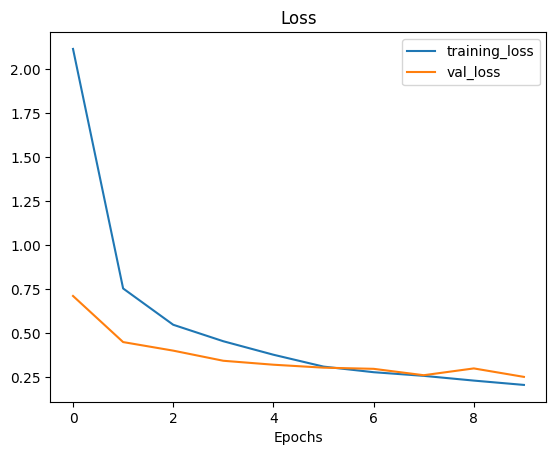

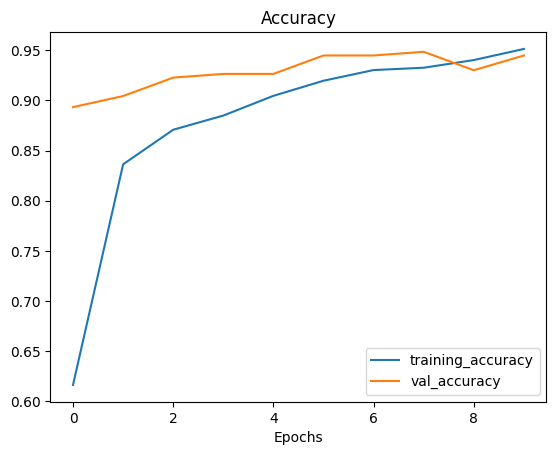

In [101]:
from helper_functions import plot_loss_curves

plot_loss_curves(history_1)

# Model 2: Feature Extraction without Data Augmentation

In [102]:
input_shape = IMG_SIZE + (3, )

base_model = tf.keras.applications.efficientnet.EfficientNetB4(include_top = False)
base_model.trainable = False


inputs = tf.keras.layers.Input(shape = input_shape, name = 'input_shape')

x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling_layer')(x)

outputs = tf.keras.layers.Dense(90, activation = 'softmax')(x)

model_2 = tf.keras.Model(inputs, outputs)

In [103]:
checkpoint_path = 'checkpoints_2/checkpoint.ckpt'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path,
    save_weights_only = True,
    save_best_only = True,
    save_freq = 'epoch',
    verbose = 1
)


model_2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_2 = model_2.fit(
    train_data,
    epochs = initial_epochs + 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = int(0.25 * len(test_data)),
    callbacks = [checkpoint_callback]

)

Epoch 1/10
270/270 [==============================] - ETA: 0s - loss: 1.5976 - accuracy: 0.7509
Epoch 1: val_loss improved from inf to 0.52328, saving model to checkpoints_2/checkpoint.ckpt
270/270 [==============================] - 45s 120ms/step - loss: 1.5976 - accuracy: 0.7509 - val_loss: 0.5233 - val_accuracy: 0.9044
Epoch 2/10
270/270 [==============================] - ETA: 0s - loss: 0.3288 - accuracy: 0.9396
Epoch 2: val_loss improved from 0.52328 to 0.32709, saving model to checkpoints_2/checkpoint.ckpt
270/270 [==============================] - 29s 107ms/step - loss: 0.3288 - accuracy: 0.9396 - val_loss: 0.3271 - val_accuracy: 0.9338
Epoch 3/10
270/270 [==============================] - ETA: 0s - loss: 0.1741 - accuracy: 0.9725
Epoch 3: val_loss improved from 0.32709 to 0.27365, saving model to checkpoints_2/checkpoint.ckpt
270/270 [==============================] - 28s 102ms/step - loss: 0.1741 - accuracy: 0.9725 - val_loss: 0.2736 - val_accuracy: 0.9522
Epoch 4/10
270/270 [

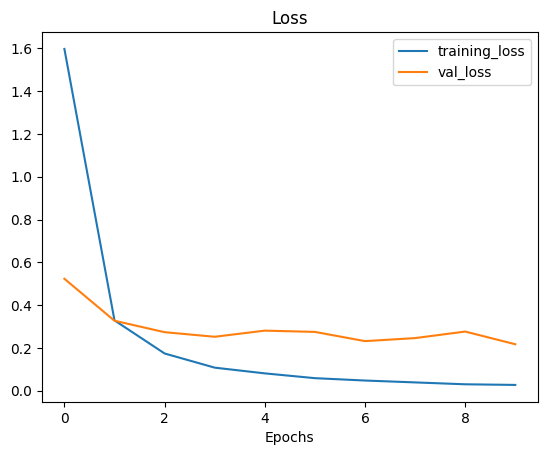

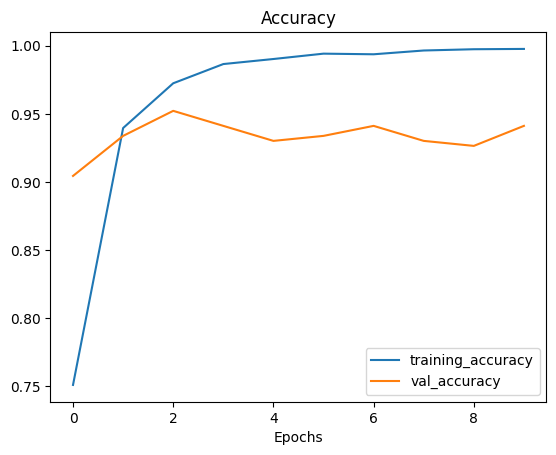

In [104]:
plot_loss_curves(history_2)

# Model 3: Fine-Tuning Model 2

In [105]:
input_shape = IMG_SIZE + (3, )

base_model = tf.keras.applications.efficientnet.EfficientNetB4(include_top = False)
base_model.trainable = True


inputs = tf.keras.layers.Input(shape = input_shape, name = 'input_shape')

x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling_layer')(x)

outputs = tf.keras.layers.Dense(90, activation = 'softmax')(x)

model_3 = tf.keras.Model(inputs, outputs)

for layer in base_model.layers[:-10]:
  layer.trainable = False



In [106]:
for layer in base_model.layers:
    print(layer.name, layer.trainable)

input_21 False
rescaling_40 False
normalization_20 False
rescaling_41 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block1b_dwconv False
block1b_bn False
block1b_activation False
block1b_se_squeeze False
block1b_se_reshape False
block1b_se_reduce False
block1b_se_expand False
block1b_se_excite False
block1b_project_conv False
block1b_project_bn False
block1b_drop False
block1b_add False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn Fal

In [107]:
model_3.load_weights('/content/checkpoints_2/checkpoint.ckpt')

In [108]:
model_3.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.0001),
    metrics = ['accuracy']
)

model_3.evaluate(test_data)

68/68 [==============================] - 12s 100ms/step - loss: 0.1916 - accuracy: 0.9463


[0.19155418872833252, 0.9462962746620178]

In [109]:
history_3 = model_3.fit(
    train_data,
    epochs = initial_epochs + 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data),
    initial_epoch = 4
)

Epoch 5/10
270/270 [==============================] - 45s 114ms/step - loss: 0.5454 - accuracy: 0.8674 - val_loss: 0.3157 - val_accuracy: 0.9231
Epoch 6/10
270/270 [==============================] - 32s 115ms/step - loss: 0.0913 - accuracy: 0.9701 - val_loss: 0.2807 - val_accuracy: 0.9370
Epoch 7/10
270/270 [==============================] - 31s 112ms/step - loss: 0.0481 - accuracy: 0.9880 - val_loss: 0.2443 - val_accuracy: 0.9463
Epoch 8/10
270/270 [==============================] - 31s 114ms/step - loss: 0.0216 - accuracy: 0.9928 - val_loss: 0.2603 - val_accuracy: 0.9426
Epoch 9/10
270/270 [==============================] - 34s 124ms/step - loss: 0.0165 - accuracy: 0.9970 - val_loss: 0.2526 - val_accuracy: 0.9454
Epoch 10/10
270/270 [==============================] - 32s 116ms/step - loss: 0.0139 - accuracy: 0.9972 - val_loss: 0.2397 - val_accuracy: 0.9528


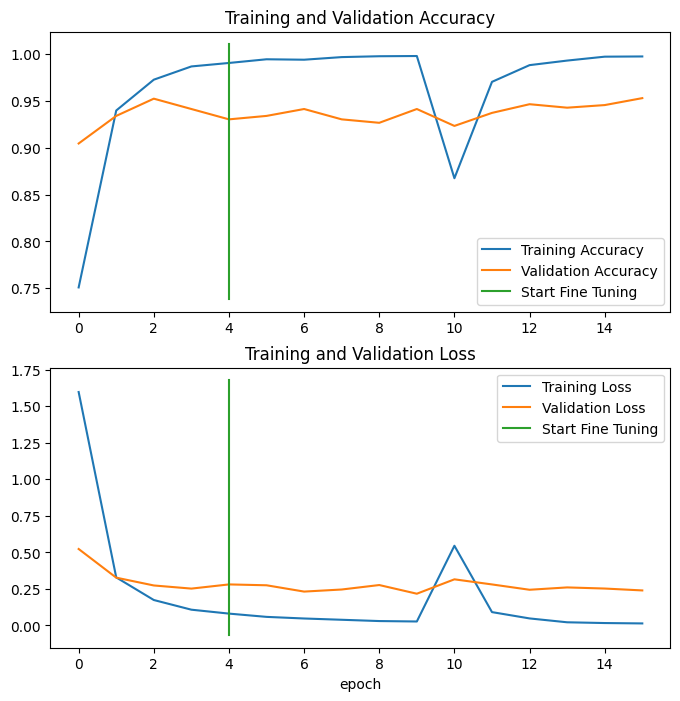

In [110]:
from helper_functions import compare_historys
compare_historys(history_2, history_3)

# Model 4: Fine-tuning Model 1

In [111]:
input_shape = IMG_SIZE + (3, )

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

base_model = tf.keras.applications.efficientnet.EfficientNetB4(include_top = False)
base_model.trainable = False


inputs = tf.keras.layers.Input(shape = input_shape, name = 'input_shape')

x = data_augmentation(inputs)
x = base_model(x)
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling_layer')(x)

outputs = tf.keras.layers.Dense(90, activation = 'softmax')(x)

model_4 = tf.keras.Model(inputs, outputs)

for layer in base_model.layers[:-10]:
  layer.trainable = False


In [112]:
model_4.load_weights('/content/checkpoints/checkpoint.ckpt')

In [113]:
model_4.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.0001),
    metrics = ['accuracy']
)

model_4.evaluate(test_data)

68/68 [==============================] - 11s 83ms/step - loss: 0.2415 - accuracy: 0.9315


[0.24154341220855713, 0.9314814805984497]

In [114]:
history_4 = model_4.fit(
    train_data,
    epochs = initial_epochs + 10,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data),
    initial_epoch = 4
)

Epoch 5/15
270/270 [==============================] - 51s 137ms/step - loss: 0.1838 - accuracy: 0.9535 - val_loss: 0.2356 - val_accuracy: 0.9315
Epoch 6/15
270/270 [==============================] - 38s 138ms/step - loss: 0.1948 - accuracy: 0.9488 - val_loss: 0.2390 - val_accuracy: 0.9343
Epoch 7/15
270/270 [==============================] - 38s 137ms/step - loss: 0.1761 - accuracy: 0.9546 - val_loss: 0.2328 - val_accuracy: 0.9361
Epoch 8/15
270/270 [==============================] - 38s 139ms/step - loss: 0.1564 - accuracy: 0.9579 - val_loss: 0.2294 - val_accuracy: 0.9352
Epoch 9/15
270/270 [==============================] - 38s 137ms/step - loss: 0.1511 - accuracy: 0.9613 - val_loss: 0.2274 - val_accuracy: 0.9352
Epoch 10/15
270/270 [==============================] - 40s 147ms/step - loss: 0.1360 - accuracy: 0.9676 - val_loss: 0.2263 - val_accuracy: 0.9380
Epoch 11/15
270/270 [==============================] - 36s 133ms/step - loss: 0.1383 - accuracy: 0.9664 - val_loss: 0.2281 - val_

## After all Model 3 is performing the best so let's try to improve it

In [115]:
model_3.evaluate(test_data)

68/68 [==============================] - 6s 83ms/step - loss: 0.2397 - accuracy: 0.9528


[0.23969262838363647, 0.9527778029441833]

In [116]:
checkpoint_path = 'checkpoints_3/checkpoint.ckpt'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path,
    save_weights_only = True,
    save_best_only = True,
    save_freq = 'epoch',
    monitor='val_accuracy',
    verbose = 1
)

model_3.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.0001),
    metrics = ['accuracy']
)

history_3 = model_3.fit(
    train_data,
    epochs = initial_epochs + 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data),
    initial_epoch = 4,
    callbacks = [checkpoint_callback]
)

Epoch 5/10
270/270 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 0.9981
Epoch 5: val_accuracy improved from -inf to 0.95463, saving model to checkpoints_3/checkpoint.ckpt
270/270 [==============================] - 49s 128ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 0.2375 - val_accuracy: 0.9546
Epoch 6/10
270/270 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 0.9984
Epoch 6: val_accuracy did not improve from 0.95463
270/270 [==============================] - 31s 113ms/step - loss: 0.0063 - accuracy: 0.9984 - val_loss: 0.2405 - val_accuracy: 0.9546
Epoch 7/10
270/270 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9991
Epoch 7: val_accuracy improved from 0.95463 to 0.95556, saving model to checkpoints_3/checkpoint.ckpt
270/270 [==============================] - 32s 116ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.2395 - val_accuracy: 0.9556
Epoch 8/10
270/270 [==============================] - ETA:

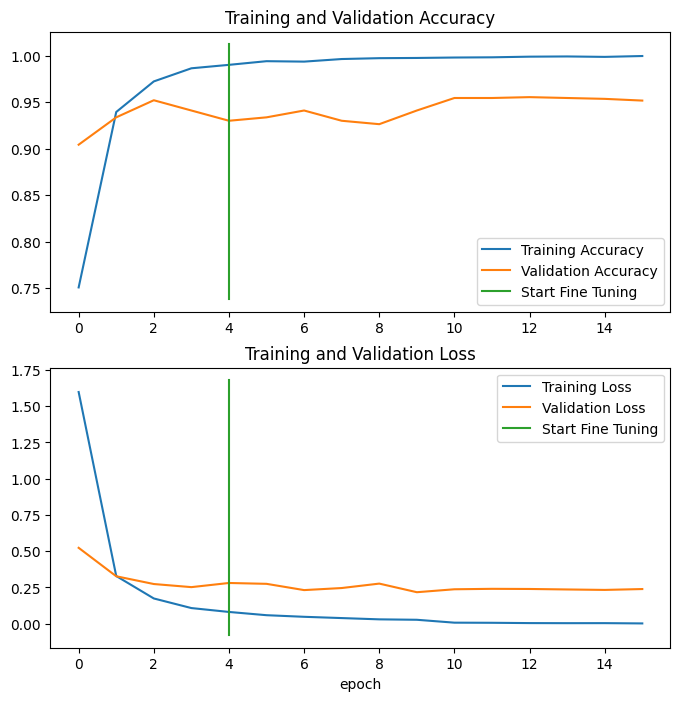

In [117]:
compare_historys(history_2, history_3)

In [118]:
model_3.load_weights('/content/checkpoints_3/checkpoint.ckpt')

In [119]:
model_3.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy']
)

model_3.evaluate(test_data)

68/68 [==============================] - 11s 83ms/step - loss: 0.2395 - accuracy: 0.9556


[0.23951390385627747, 0.9555555582046509]

In [120]:
model_3.evaluate(train_data)

270/270 [==============================] - 24s 87ms/step - loss: 9.3139e-04 - accuracy: 0.9998


[0.0009313891059719026, 0.9997684955596924]

# In conclusion:
  * Model 3 doesn't look like it will improve more, but still with total of 5400 of pictures:
    * 99.98% accuracy - training data
    * 95.56% accuracy - test data
  * Future improvement
    * If training for longer ( more epochs ) it might get slightly better results
    * Try different architecture
    * More data ( Right now for every class there are 48 images for training and 12 for testing )
    * Don't use Fine-Tuning